In [68]:
library(tidyverse)
library(palmerpenguins)
library(broom)
library(modelr)

options(repr.plot.width = 10, repr.plot.height = 5) 

# Linear Regression Model
**Lecture 2 - Demo**

In [6]:
penguins_clean <-
    penguins %>%
    drop_na() %>%
    select(-year)

penguins_clean %>%
    slice_sample(n = 5)

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>
Adelie,Dream,41.5,18.5,201,4000,male
Gentoo,Biscoe,45.0,15.4,220,5050,male
Gentoo,Biscoe,48.5,14.1,220,5300,male
Chinstrap,Dream,50.3,20.0,197,3300,male
Chinstrap,Dream,45.7,17.0,195,3650,female


## 1. **One Binary Covariate**

### 1.1 **What the model looks like**

#### 1.1.1 **Dummy Variables**

### 1.2 **Fitting using R**

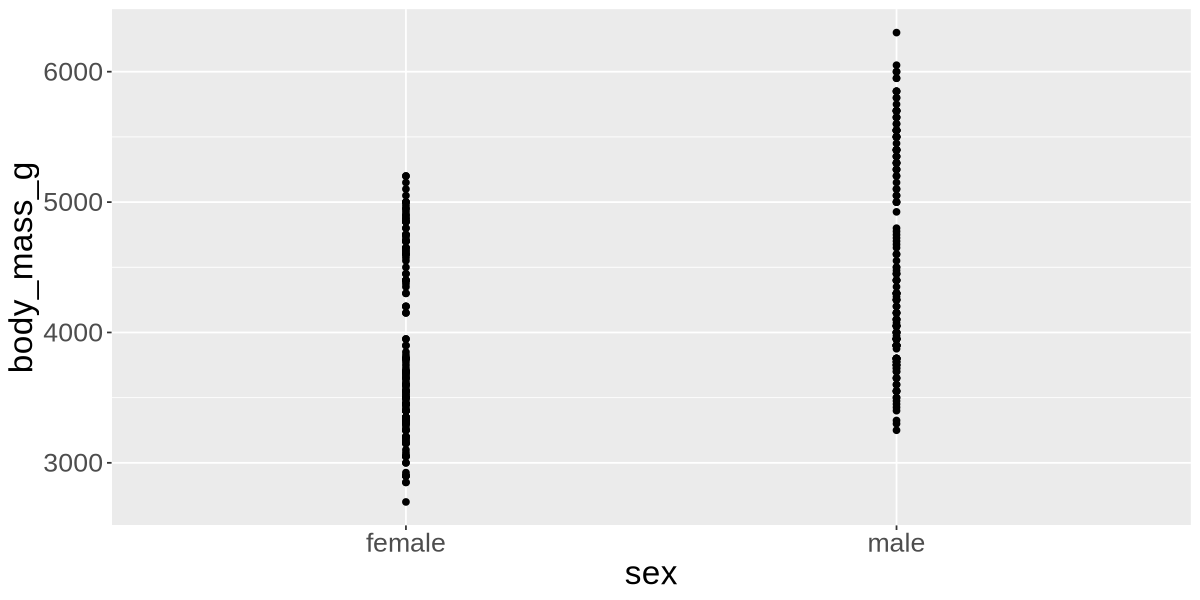

In [12]:
options(repr.plot.width = 10, repr.plot.height = 5) 

penguins_clean %>%
    ggplot() + 
    geom_point(aes(sex, body_mass_g)) + 
    theme(text = element_text(size = 20))

In [13]:
penguins_sex_lm <- lm(body_mass_g ~ sex, data = penguins_clean)

tidy(penguins_sex_lm) %>%
    mutate_if(is.numeric, round, 2)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),3862.27,56.83,67.96,0
sexmale,683.41,80.01,8.54,0


R will automatically create the dummy variables for you. 

R will merge the name of the variable (in this case `sex`) with the level of the variable the coefficient is associated with (in this case `male`), resulting in `variablelevel` term (in this case `sexmale`). 

- Reference level: `female` (you can tell that this is the reference level because there is no term `sexfemale`)
    - average `body_mass_g` is given by `(intercept)` term $3862.37$
- `sexmale` is the **difference** between the mean body_mass_g between males and females.
- the average `body_mass_g` for male is given by $3862.37 + 683.41 = 4545.68$ 

---------

Note that now we **cannot** say 

> an increase of 1 unit of X is associated with an expected increase of one $\beta_1$ units in $Y$. 

because $X$ has no unit anymore, it is just enconding the categories. 

### 1.3 **Equivalent to t-test from STAT 201**

In [28]:
t.test(body_mass_g ~ sex, 
       data = penguins_clean,
       var.equal = TRUE) # Remember that we are assuming the same variance for all the errors.


	Two Sample t-test

data:  body_mass_g by sex
t = -8.5417, df = 331, p-value = 4.897e-16
alternative hypothesis: true difference in means between group female and group male is not equal to 0
95 percent confidence interval:
 -840.8014 -526.0222
sample estimates:
mean in group female   mean in group male 
            3862.273             4545.685 


## 2. **Categorical covariate with more than 2 categories**

### 2.1 **What the model looks like**

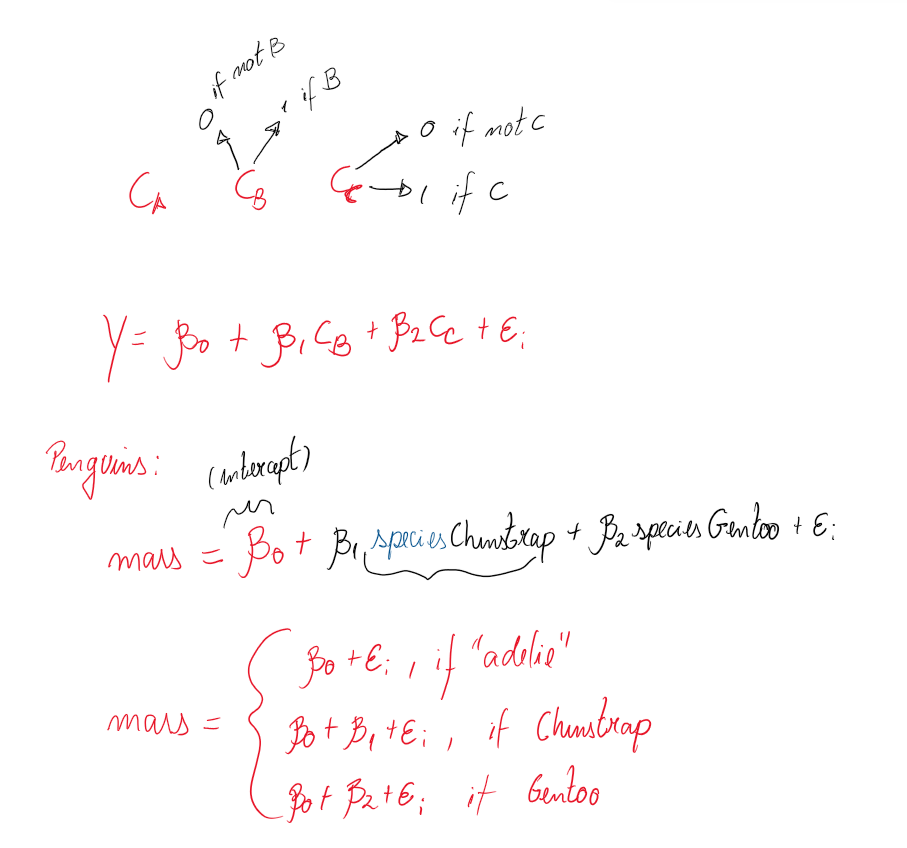

### 2.2 **Fitting using R**

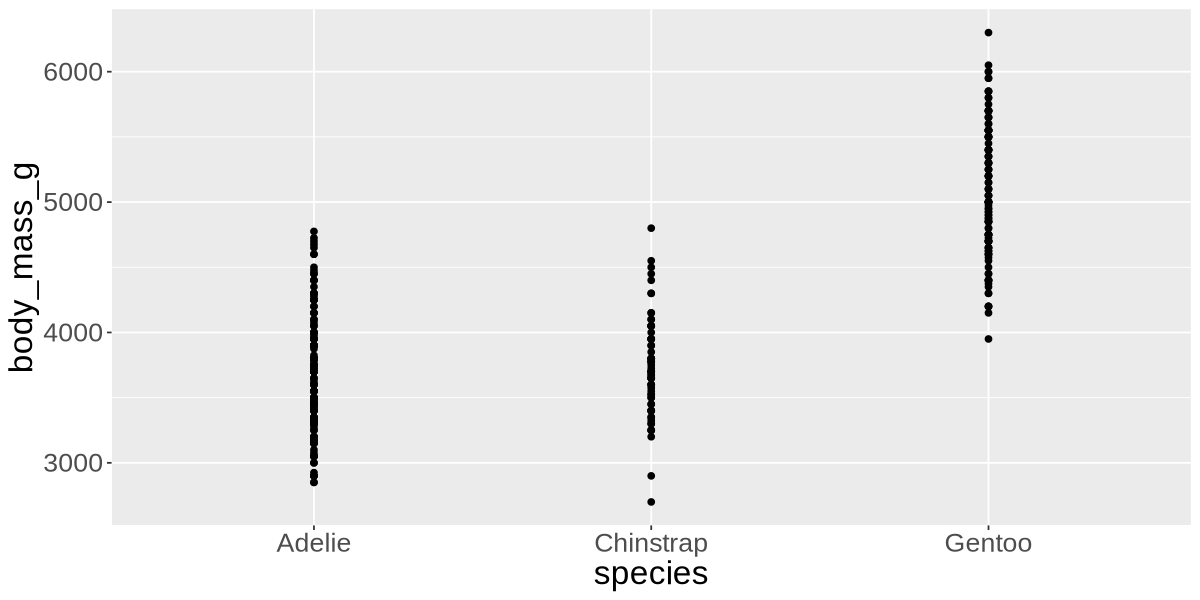

In [59]:
penguins_clean %>%
    ggplot() + 
    geom_point(aes(species, body_mass_g)) + 
    theme(text = element_text(size = 20))

In [39]:
penguins_species_lm = lm(body_mass_g ~ species, data = penguins_clean)

summary(penguins_species_lm)


Call:
lm(formula = body_mass_g ~ species, data = penguins_clean)

Residuals:
     Min       1Q   Median       3Q      Max 
-1142.44  -342.44   -33.09   307.56  1207.56 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       3706.16      38.14  97.184   <2e-16 ***
speciesChinstrap    26.92      67.65   0.398    0.691    
speciesGentoo     1386.27      56.91  24.359   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 460.8 on 330 degrees of freedom
Multiple R-squared:  0.6745,	Adjusted R-squared:  0.6725 
F-statistic: 341.9 on 2 and 330 DF,  p-value: < 2.2e-16


Now we are comparing the means of 3 `species`: `Adelie`, `Chinstrap`, and `Gentoo`. 

**Question: Which species is the reference level here?**

- Reference level: `Adelie` species.
    - Average given by `(intercept)` term: $3706.16$

<br>

- `speciesChinstrap`: 
    - difference from `Adelie`: $26.92$
    - average: $3706.16 + 26.92 = 3733.08$

<br>

- `speciesGentoo`:
    - difference from `Adelie`: $1386.27$
    - average: $3706.16 + 1386.27 = 5092.43$

In [44]:
# Let's check if this is correct
penguins_clean %>%
    group_by(species) %>%
    summarise(avg = mean(body_mass_g))

species,avg
<fct>,<dbl>
Adelie,3706.164
Chinstrap,3733.088
Gentoo,5092.437


### 2.3 Difference in means?

In STAT 201, we test difference in means for more than 2 groups using ANOVA. Let's see:

In [46]:
tidy(aov(body_mass_g ~ species, data = penguins_clean))

term,df,sumsq,meansq,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
species,2,145190219,72595109.6,341.8949,3.744505e-81
Residuals,330,70069447,212331.7,NA,NA


Compare the value of the statistic with the F-statistic of the regression model. 
In this case, since the p-value is close to 0, we conclude that at least one of the means is different (with any reasonable significance level).

## 3. One Categorical and One Numerical 

### 3.1 **What the model looks like**

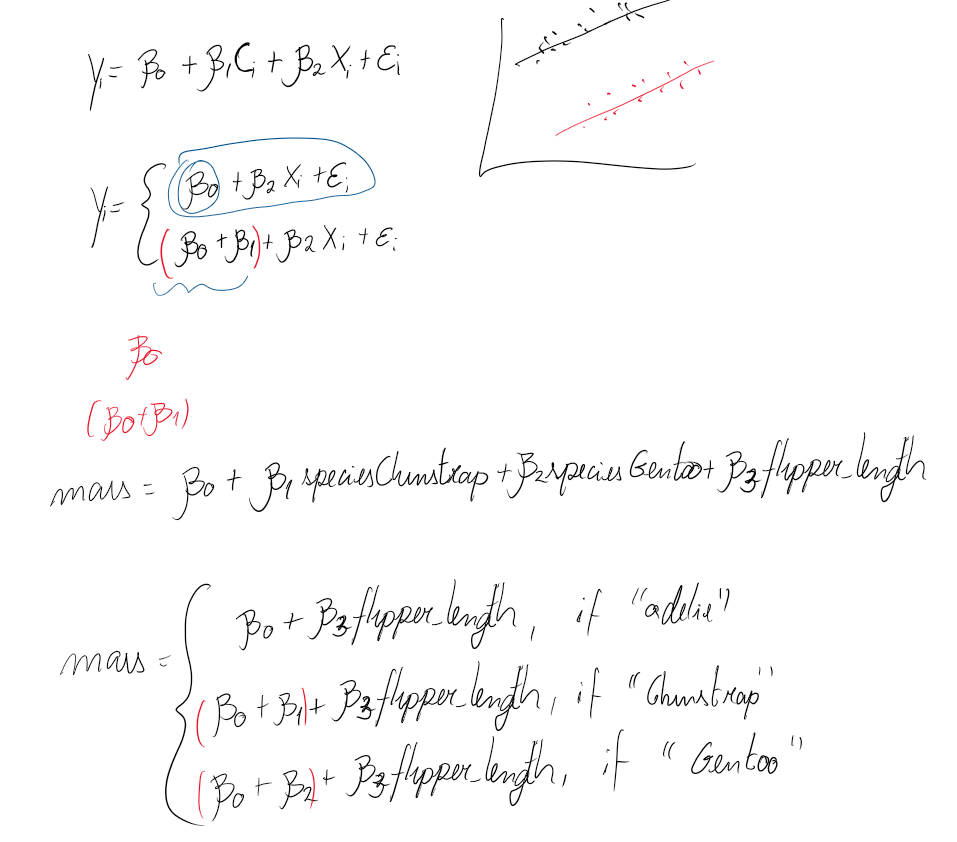

### 3.2 **Fitting using R**

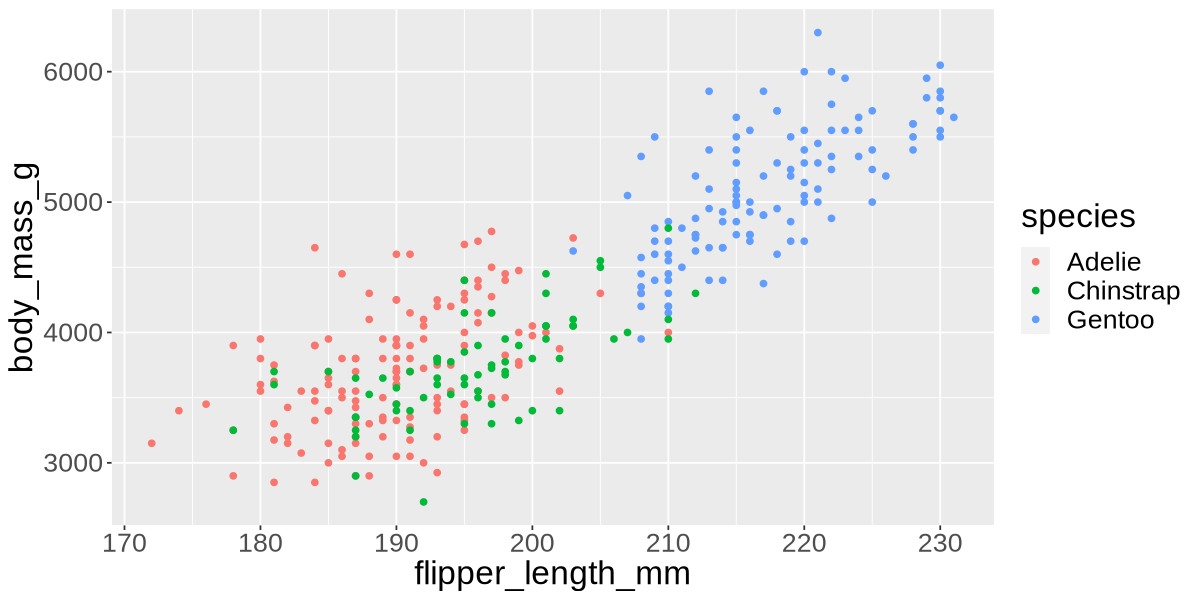

In [60]:
penguins_clean %>%
    ggplot() + 
    geom_point(aes(flipper_length_mm, body_mass_g, color = species)) + 
    theme(text = element_text(size = 20))

In [61]:
penguins_mlr_lm = lm(body_mass_g ~ species + flipper_length_mm, data = penguins_clean)

summary(penguins_species_lm)


Call:
lm(formula = body_mass_g ~ species + flipper_length_mm, data = penguins_clean)

Residuals:
   Min     1Q Median     3Q    Max 
-898.8 -252.0  -24.8  229.8 1191.6 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -4013.18     586.25  -6.846 3.74e-11 ***
speciesChinstrap   -205.38      57.57  -3.568 0.000414 ***
speciesGentoo       284.52      95.43   2.981 0.003083 ** 
flipper_length_mm    40.61       3.08  13.186  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 373.3 on 329 degrees of freedom
Multiple R-squared:  0.787,	Adjusted R-squared:  0.7851 
F-statistic: 405.3 on 3 and 329 DF,  p-value: < 2.2e-16


- Reference level: `Adelie` species.
    - Intercep of the line given by `(intercept)` term: $-4013.18$

<br>

- `speciesChinstrap`: $-205.38$ is the *difference* between intercepts of `Adelie` line and `Chinstrap` line
    - intercept: $-4013.18 - 205.38 = -4218.56$

<br>

- `speciesGentoo`: $284.52$ is the *difference* between intercepts of `Adelie` line and `Gentoo` line
    - intercept: $-4013.18 + 284.52 = -3728.66$
    
<br> 

- The **slope** is the same for across 3 species: 40.61
    - **Important:** Note that this might not be true, it could be possible that the slope changes with the species (more on this later). 
    - For a 1mm increase in flipper length, we expect to observe an increase of 40.61g in body mass.

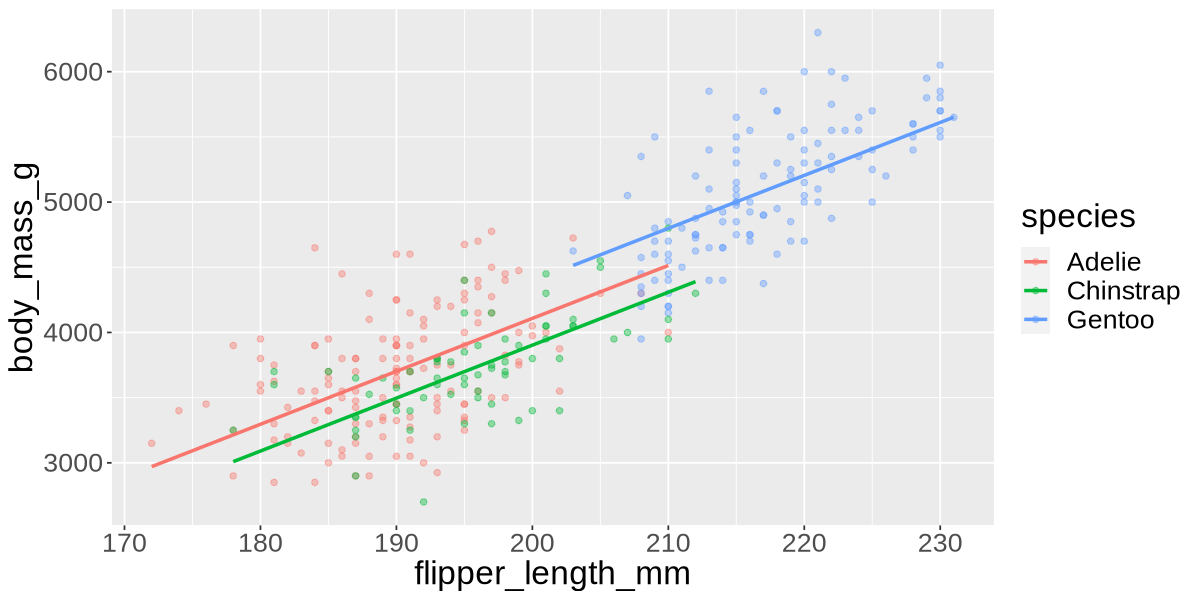

In [74]:
# Let's check if this is correct
penguins_clean %>%
    add_predictions(penguins_mlr_lm, var = 'predictions') %>%
    ggplot() + 
    geom_point(aes(flipper_length_mm, body_mass_g, color = species), alpha = .4) + 
    geom_line(aes(flipper_length_mm, predictions, color = species), lwd = 1) +
    theme(text = element_text(size = 20))


In this model, the difference in the means between the groups do not depend on the `flipper_length_mm`.

## 4. **MLR with interaction**

### 4.1 **What the model looks like**

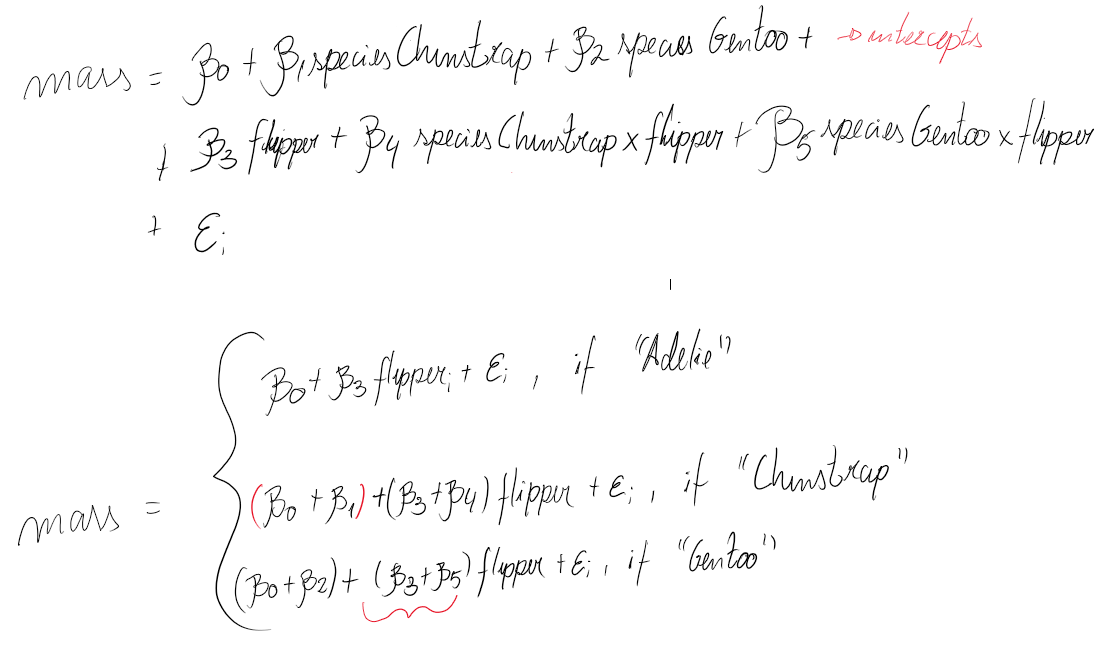

### 4.2 **Fitting using R**

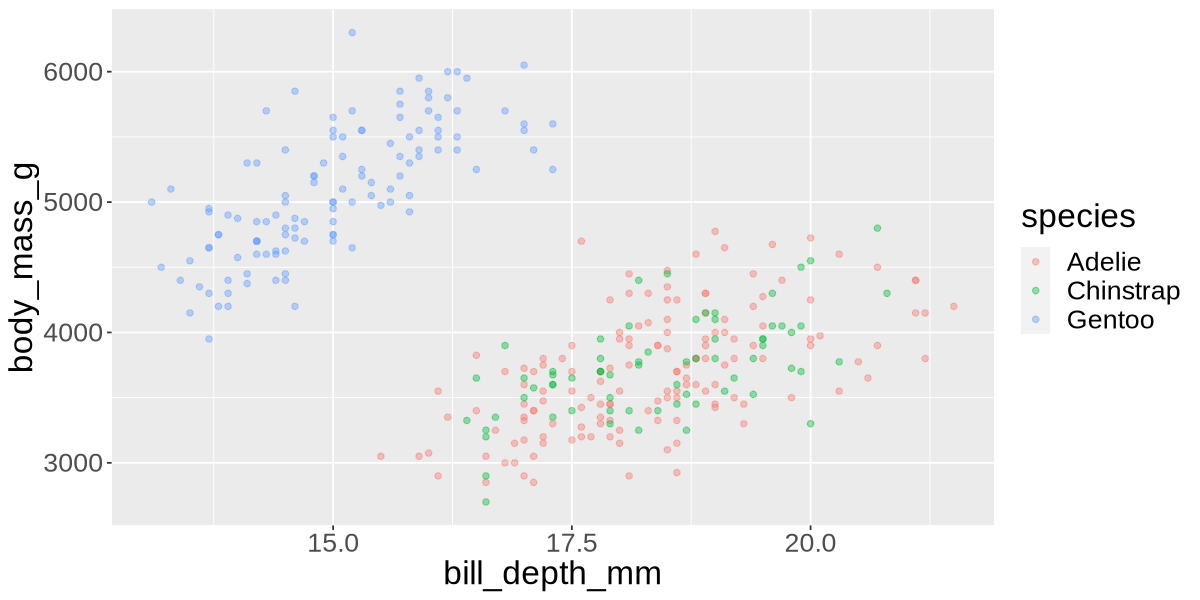

In [99]:
# Let's check if this is correct
penguins_clean %>%
    ggplot() + 
    geom_point(aes(bill_depth_mm, body_mass_g, color = species), alpha = .4) + 
    theme(text = element_text(size = 20))


In [97]:
penguins_int <- lm(body_mass_g ~ species * bill_depth_mm, data = penguins_clean)

summary(penguins_int)


Call:
lm(formula = body_mass_g ~ species * bill_depth_mm, data = penguins_clean)

Residuals:
    Min      1Q  Median      3Q     Max 
-836.31 -255.82  -30.44  229.58 1156.89 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     -297.38     441.69  -0.673 0.501242    
speciesChinstrap                 261.16     828.02   0.315 0.752654    
speciesGentoo                   -124.43     663.33  -0.188 0.851314    
bill_depth_mm                    218.21      24.02   9.084  < 2e-16 ***
speciesChinstrap:bill_depth_mm   -13.58      44.91  -0.302 0.762491    
speciesGentoo:bill_depth_mm      149.49      40.76   3.668 0.000286 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 352.7 on 327 degrees of freedom
Multiple R-squared:  0.811,	Adjusted R-squared:  0.8081 
F-statistic: 280.7 on 5 and 327 DF,  p-value: < 2.2e-16


**Interpreptation:**

- Reference level: `Adelie` species.
    - Intercept of the `Adelie` line given by `(intercept)` term: $-297.38$
    - slope for the `Adelie` line: $218.21$

<br>

- `speciesChinstrap`: $261.16$ is the *difference* between intercepts of `Adelie` line and `Chinstrap` line
    - intercept of `Chinstrap` line: $-297.38 + 261.16.21$

<br>

- `speciesGentoo`: $284.52$ is the *difference* between intercepts of `Adelie` line and `Gentoo` line
    - intercept: $-4013.18 + 284.52 = -3728.66$
    
<br> 

- `bill_depth_mm`: $218.21$ slope of the reference line `Adelie`

- `speciesChinstrap:bill_depth_mm`: -13.58 is the *difference* between the **slopes** of `Adelie` line and `Chinstrap` line

- `speciesGentoo:bill_depth_mm`: -149.49 is the *difference* between **slopes** of `Adelie` line and `Gentoo` line

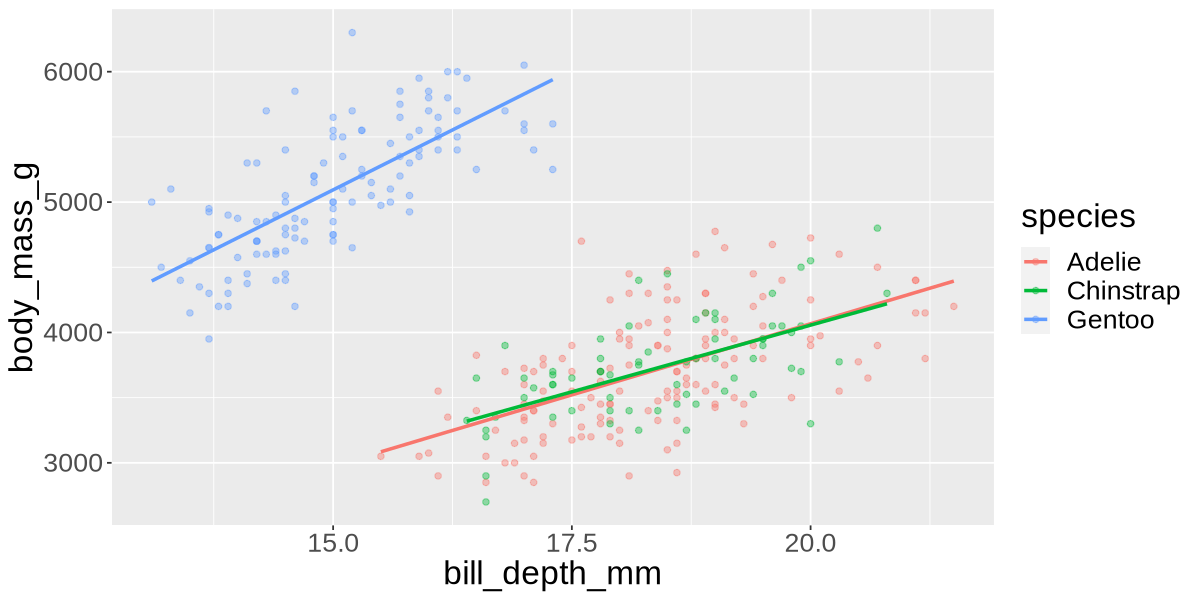

In [98]:
# Let's check if this is correct
penguins_clean %>%
    add_predictions(penguins_int, var = 'predictions') %>%
    ggplot() + 
    geom_point(aes(bill_depth_mm, body_mass_g, color = species), alpha = .4) + 
    geom_line(aes(bill_depth_mm, predictions, color = species), lwd = 1) +
    theme(text = element_text(size = 20))
